In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# FUNCTIONS

### Augmenting Data Function

In [4]:
def augmented_data(x_train, TYPE=1, perc_augm=1, plot_if=1): #perc_augm: % of x_train to shift and add; plot_if: plots or not
    x_shift = np.copy(x_train)+np.random.random()
    w = np.sqrt(np.std(x_train)) #  square root of std deviation
    rnd_arr = (np.random.rand(len(x_shift), 2)-0.5)*w
    x_shift = x_shift + rnd_arr
    #reducing x_shift (perc_augm)
    index = int(len(x_shift)*(1-perc_augm))
    if index > 0:
        x_shift = np.delete(x_shift,range(index),0)
    #merging x datas
    x_train_shift = np.concatenate((x_train,x_shift))
    #y
    y_train_shift = np.zeros(len(x_train_shift))
    for i in range(len(x_train_shift)):
        # label data according to a nonlinear function "f"
        y_train_shift[i] = f(x_train_shift[i],TYPE)
    
    # plots: yes=1
    if plot_if==1:
        size=15
        plt.figure(figsize=(5,5))
        plt.scatter(x_train[:,0],x_train[:,1],label='original',c='red',s=size,alpha=0.75)
        plt.scatter(x_shift[:,0],x_shift[:,1],label='shifted',c='lightgreen',s=size,alpha=0.75)
#         plt.scatter(x_valid[:,0],x_valid[:,1],label='valid',c='blue',s=size,alpha=0.75)  
        plt.title('% Augmentation Train Set:'+str(perc_augm)), plt.legend()
        plt.show()
    return x_train_shift, y_train_shift


### Rescale and Boundaries Function

In [5]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w"),ax.plot((-20,50),(-40,-40),c="w"),ax.plot((-10,50),(50,-10),c="w")

### DNN Analisys Function

In [17]:
def DNN_analisys(x, perc_train=0.8, TYPE=1, perc_augm=0.8):
    N, L =len(x), 2
    N_train = int(perc_train * N)
    (x_train, y_train) = (x[0:N_train],y[0:N_train])
    (x_valid, y_valid) = (x[N_train:],y[N_train:])
    
    x_train_shift, y_train_shift = augmented_data(x_train, perc_augm=perc_augm)
    x_train_shift = Rescale(x_train_shift)
    x_valid = Rescale(x_valid)
    
    #CASE=1
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    #print(model.summary())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #FIT
    nepoch = 400
    fit = model.fit(x_train_shift, y_train_shift, epochs = nepoch, batch_size = 50, validation_data=(x_valid,y_valid),verbose=0)
    
    #ACCURACY/LOST PLOTS
    fig,AX=plt.subplots(1,2,figsize=(14,6.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],label="train_shift")
    ax.plot(fit.history['val_accuracy'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax=AX[1]
    ax.plot(fit.history['loss'],label="train_shift")
    ax.plot(fit.history['val_loss'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.legend()
    
    #PREDICTION GRID PLOTS
    dX = 2
    X1 = np.arange(-50,50+dX, dX)
    LG = len(X1)
    grid = np.zeros((LG*LG,2))
    k=0
    for i in range(LG):
        for j in range(LG):
            grid[k,:]=(X1[j],X1[i])
            k=k+1
    grid_r = grid/50
    pred = model.predict(grid_r)
    
    fig2,AX2=plt.subplots(1,3,figsize=(16,5.))
    ax=AX2[0]
    ax.scatter(x[:,0],x[:,1],c=y)
    ax.plot((-20,-20),(-40,50),c="w"),ax.plot((-20,50),(-40,-40),c="w"),ax.plot((-10,50),(50,-10),c="w")
    ax=AX2[1]
    ax.scatter(grid[:,0],grid[:,1],c=pred)
    ax.plot((-20,-20),(-40,50),c="w"),ax.plot((-20,50),(-40,-40),c="w"),ax.plot((-10,50),(50,-10),c="w")
    ax=AX2[2]
    W1=np.where(pred>0.5)[0] 
    ax.scatter(grid[:,0],grid[:,1],c="#440154")
    ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
    ax.plot((-20,-20),(-40,50),c="w"),ax.plot((-20,50),(-40,-40),c="w"),ax.plot((-10,50),(50,-10),c="w")

# Analisys: 'Triangle' non linear function

In [18]:
np.random.seed(111)

<function matplotlib.pyplot.show(close=None, block=None)>

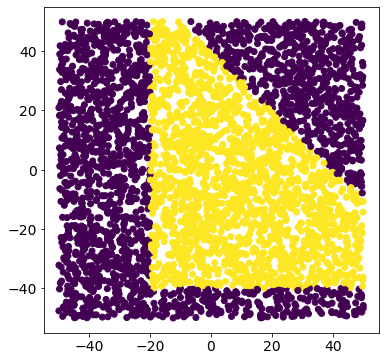

In [19]:
N=4000
B=100
# training data
perc_train = 0.8

#creating x and y
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
TYPE=1
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

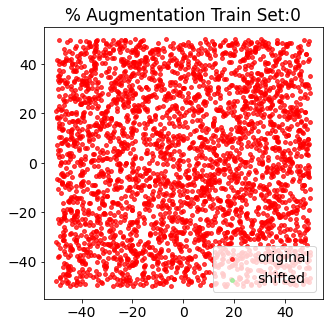

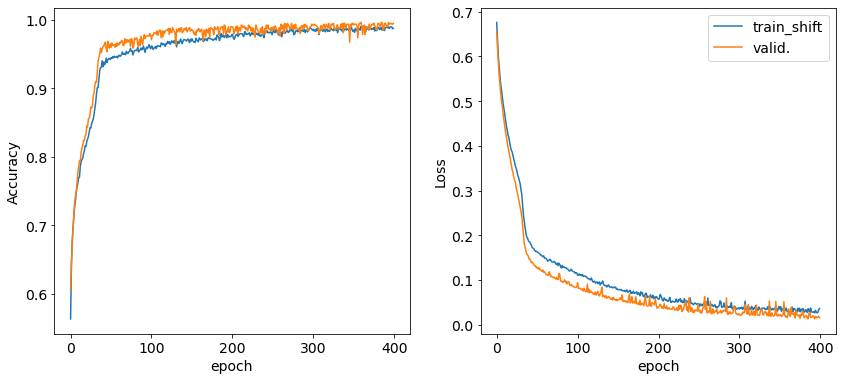

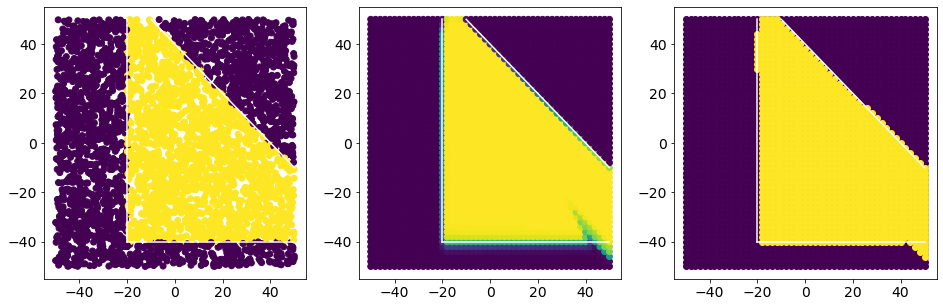

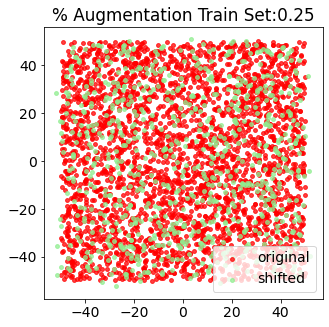

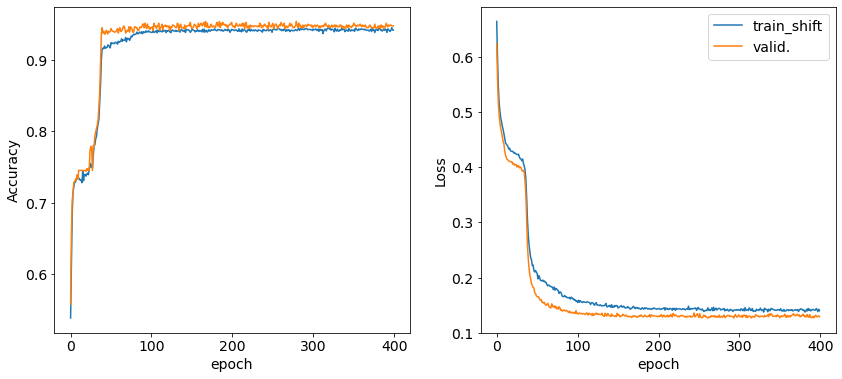

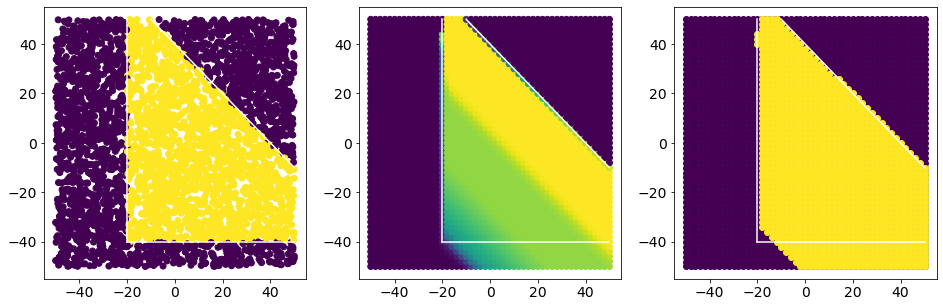

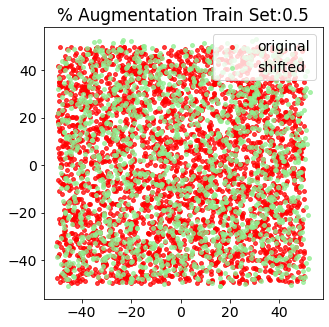

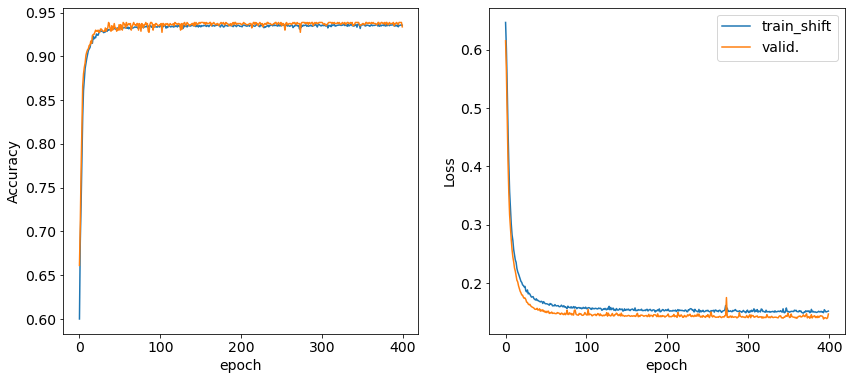

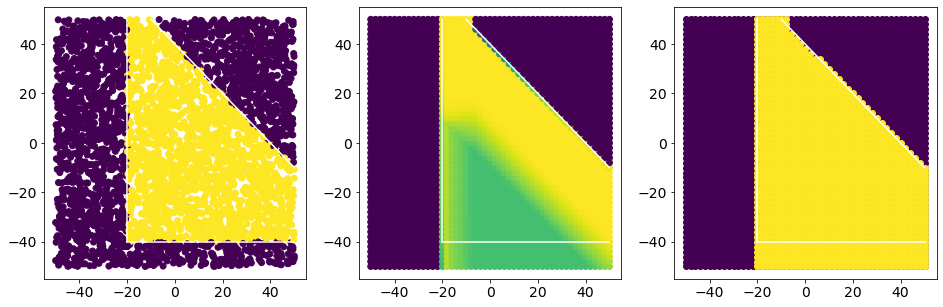

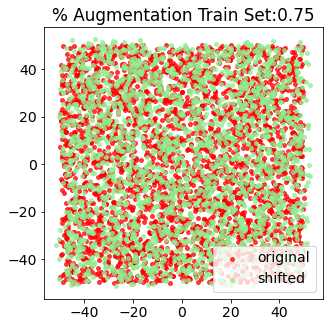

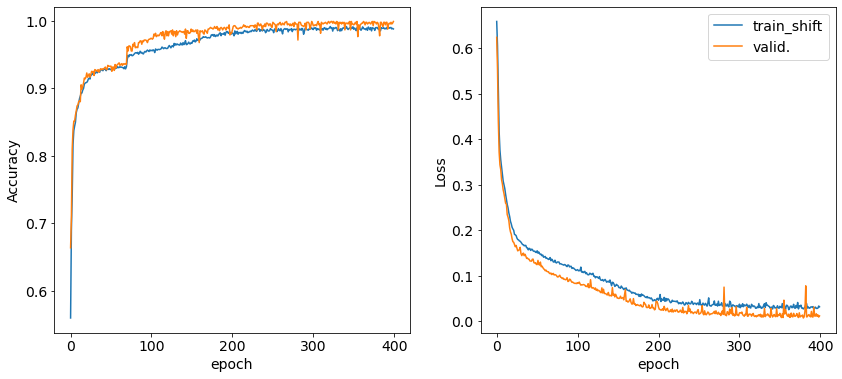

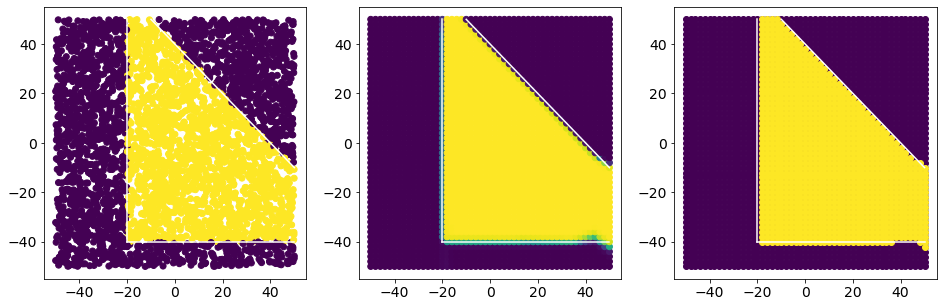

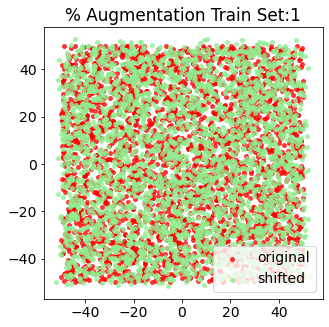

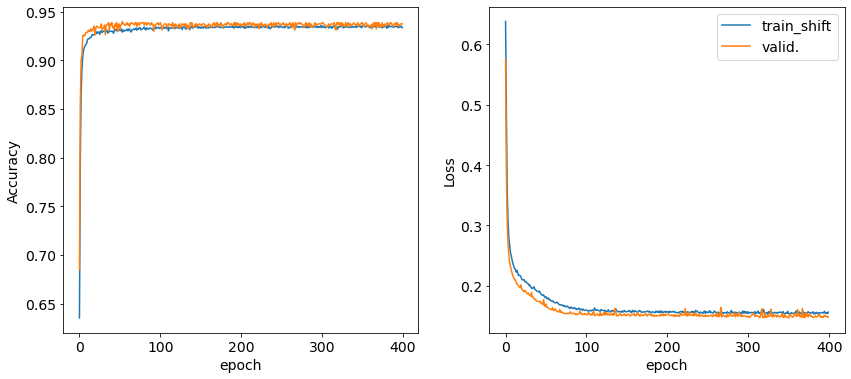

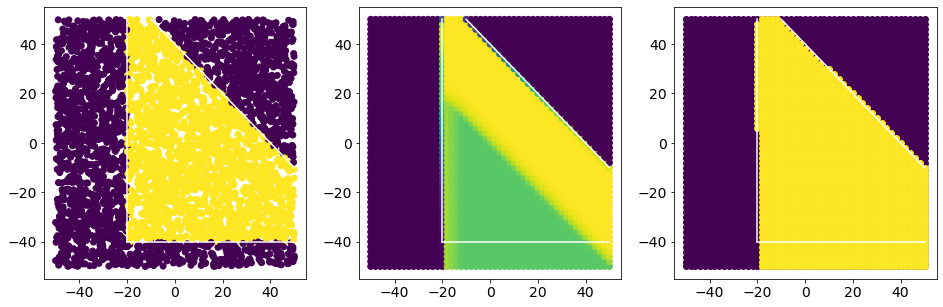

In [20]:
augm_percs = [0, 0.25, 0.5, 0.75, 1]
for perc in augm_percs:
    DNN_analisys(x, perc_augm=perc)

## Observations

Once the x, y data (training and valid) have been created, x_train has been augmented for several percentages: from 0 to 100%, where the trainset is practically doubled. The predictive capabilities of the model were evaluated after the fit for each percentage. With the same model, DNN worked better with the train set augmented by 75% and, to a slightly lesser extent, 0%. This all makes sense, as the more data the better a model can predict; obviously trying to avoid 'overfitting': this is why, if we exclude the case of perc_augm 0%, we can explain why an intermediate number of data works better than extreme cases